## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assuredf.head() you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the csv file into a dataframe
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#number of rows in the dataset
df_length = df.shape[0]
print('No. of rows in the Dataset: ' + str(df_length) )


No. of rows in the Dataset: 294478


c. The number of unique users in the dataset.

In [4]:
#number of unique ids
num_uniqueid = df.user_id.nunique()
print('No. of unique user ids: ' + str(num_uniqueid))


No. of unique user ids: 290584


d. The proportion of users converted.

In [5]:
'''proportion of users converted
using mean() since converted column has binary values'''

df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#number of times the landing_page and group column didn't line up

no_lineup = df[((df.group =='treatment') & (df.landing_page == 'old_page') | (df.group == 'control') & (df.landing_page == 'new_page'))].shape[0]
print(str(no_lineup) + ' times the new_page and treatment didnt line up')

3893 times the new_page and treatment didnt line up


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#delete the rows that didn't lineup

df2 = df.drop(df[((df.group =='treatment') & (df.landing_page == 'old_page') | (df.group == 'control') & (df.landing_page == 'new_page'))].index)

In [9]:
#new dataframe size
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2_len,num_uniqueid = df2.shape[0],df2.user_id.nunique()
print('Number of rows in the new dataframe: '+ str(df2_len))
print('Number of unique ids in the new dataframe:' + str(num_uniqueid))

Number of rows in the new dataframe: 290585
Number of unique ids in the new dataframe:290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#find the duplicate user id
df2[df2.duplicated('user_id')==True].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated('user_id',keep=False)==True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(df2[df2.duplicated('user_id')==True].index,inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
prob_converted = df.converted.mean()
print('The probability of conversion is: ' + str(prob_converted))

The probability of conversion is: 0.119659193556


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
prob_control = (df2.query('group=="control"')['converted']==1).mean()
print('Probability converted given that individual in control group: ' + str(prob_control))

Probability converted given that individual in control group: 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
prob_treat = (df2.query('group=="treatment"')['converted']==1).mean()
print('Probability converted given that individual in treatment group: ' + str(prob_treat))

Probability converted given that individual in treatment group: 0.118808065515



d. What is the probability that an individual received the new page?

In [18]:
prob_newpage = df2[df2.landing_page=='new_page'].shape[0]/df2.shape[0]
print('Probability that an individual recieved new page: ' + str(prob_newpage))

Probability that an individual recieved new page: 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Answer:**<br>
<font color = blue> According to the above results, the control group(who recieved old page) have slightly higher conversion rate than the treatment group(who recieved new page), however the difference  is not too significant for us to say that one page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis:
$H_{0}$ : $p_{new}$ <= $p_{old}$

Alternate Hypothesis:
$H_{1}$ : $p_{new}$ > $p_{old}$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#probability of conversion for new page
p_new = (df2['converted']).mean()
print(p_new)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [20]:
#probability of conversion for old page
p_old  = (df2['converted']).mean()
print(p_old)


0.119597087245


Since we assume under null hypothesis $p_{new}$ and $p_{old}$ have the same success rate, I have calculated $p_{new}$ and $p_{old}$ as $p_{overall}$ which I calculated earlier in part I 4a.

In [21]:
#calculate n-new and n-old
n_new,n_old = df2.landing_page.value_counts()
print(n_new,n_old)

145310 145274


c. What is $n_{new}$?

Number of tests with new page
<font color = blue> 
**$n_{new}:$145310**

d. What is $n_{old}$?

Number of tests with old page
<font color = blue> 
**$n_{old}:$ 145274**

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted=np.random.choice([1,0],size=n_new,p=[p_new,(1-p_new)])
new_page_converted.mean()

0.11909710274585369

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1,0],size=n_old,p=[p_old,(1-p_old)])
old_page_converted.mean()

0.119539628563955

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#calculate diffrence in p under null hypothesis
new_page_converted.mean()-old_page_converted.mean()


-0.00044252581810130809

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice([1,0],size=n_new,p=[p_new,(1-p_new)])
    old_page_converted = np.random.choice([1,0],size=n_old,p=[p_old,(1-p_old)])
    diff=new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

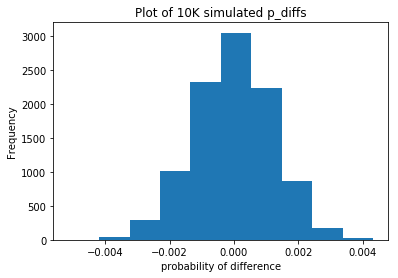

In [26]:
plt.hist(p_diffs)
plt.xlabel('probability of difference')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
act_diff =  (prob_treat-prob_control).mean()
print(act_diff)

-0.00157823898536


In [28]:
#calculate the p-value
(p_diffs>act_diff).mean()

0.90139999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?<br>


**Answer:**<br>
<font color = blue>
❖ We computed a value called the "p-value" which suggests whether to reject a      null hypothesis or not.
    
❖ Here the p-value is very high which suggests that we cannot reject the null      hypothesis.
    
❖ According to our histogram and results, the new page does not do better and      we fail to reject the null.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:


convert_old = df2.query('group=="control" and converted==1').shape[0]
convert_new = df2.query('group=="treatment" and converted==1').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)


17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
import statsmodels.api as sm
z_score,p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')
print('z_score= '+str(z_score))
print('p_value= '+str(p_value))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


z_score= 1.31092419842
p_value= 0.905058312759


In [31]:
from scipy.stats import norm
# Critical value for a one tailed test at confidence level of 95%
print('Critical value:'+str(norm.ppf(1-(0.05))))


Critical value:1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**<br>
<font color = blue> 
❖ The p value found using z-test agrees with the finding in part j, suggesting    that we fail to reject the null.<br>

❖ We find that the z-score of 1.31092419842 is less than the critical value of    1.64485362695. So, we fail to reject the null hypothesis.<br>

❖ These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color = blue> ** ❖ Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept']=1
df2[['control','treatment']]  = pd.get_dummies(df2['group'])
df2.rename(columns={'treatment':'ab_page'},inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
log_mod = sm.Logit(df2['converted'],df2[['ab_page','intercept']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        20:25:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?<br><br>


**Answer:**<br>
<font color = blue> 
The p-value associated with ab_page is 0.19, which is different from the value computed earlier. 
However, this p-value is stil high to reject the null hypothesis.<br>
This differs because the logistic regression approach is a two sided test whereas the former is a one sided test.<br>
The null and alternative in the regression case is:<bfr>
$$ H_0: P_{new} = P_{old} $$$$ H_1: P_{new} \neq P_{old} $$<br>
    Here the alternative is 'not equal' which is a two sided test, while in the A/B test our hypotheses were different (a one tailed test).<br>



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**<br>
<font color = blue> 
 ❖   It is always a good idea to consider adding few other factors in the         regression model as they might influence the conversions too.Factors like       'duration' the more a customer spends on a page is likely to give a             conversion.<br>
❖ The disadvantages might be when adding more factors, one or more of the other   regressors might lose their significance .
    
    

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [35]:
#read the country csv file
country_df = pd.read_csv('countries.csv')
country_df.head()

#find the unique countries to create dummy variables
country_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [36]:
df_new = country_df.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new.country)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [37]:
log_mod = sm.Logit(df_new['converted'],df_new[['US','UK','intercept']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        20:26:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
US             0.0099      0.013      0.746      0.456      -0.016       0.036
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

<font color=blue>
The baseline here is CA. The p-values for US and UK are high that we fail to reject the null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
log_mod = sm.Logit(df_new['converted'],df_new[['ab_page','US','UK','intercept']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        20:26:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0099      0.013      0.743      0.457      -0.016       0.036
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
==============================================================================
"""

<font color =blue>
The p-value didnt change after adding the ab_page along with countries. The p-values are still high that we fail to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions:
<font color=blue>
   ❖ Well, we used different techniques to find which of our hypothesis is true. In both hypothesis testing and logistic regression model, the p-values were higher suggesting that our null hypothesis is true(ie fail to reject the null hypothesis).<br><br>
   ❖ Even after adding a country variable to our logistic regression model the p-value was high and didnt change.Hence we conclude that we have no evidence to reject the null hypothesis.<br><br>
   ❖The e-commerce company should keep the old page since the difference in conversion rate between old page and new page is not too significant.

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0